## Usage Guide
[Usage Guide — Matplotlib 3.2.2 documentation](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### A simple example
Matplotlib graphs data on `Figure`, each of which can contain one or more `Axes`. The most simple way of creating a figure with an axes is using `pyplot.subplots`. We can then use `Axes.plot` to draw some data on the axes.

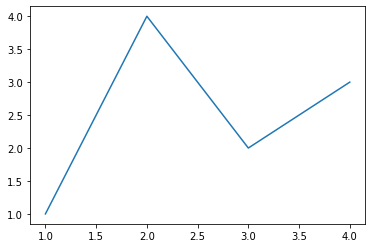

In [49]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

For each `Axes` graphing method, there is a corresponding function in the `matplotlib.pyplot` module that performs that plots on the "current" axes, creating the axes (and its parent figure) if they don't exist yet. So the previous example can be written more shortly as:

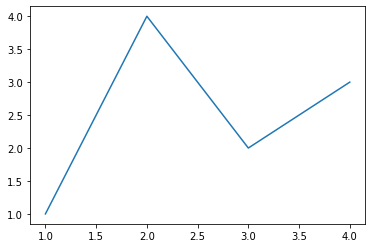

In [50]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

### Parts of a Figure
![Components of a Matplotlib figure](https://matplotlib.org/_images/anatomy.png)

#### Figure
This is the whole figure. The figure keeps track of all the child `Axes`(plots), special artists(titles, figure legends, etc), and the canvas (it is more-or-less invisible to you as the user). A figure can contain any number of `Axes`, but will typically have at least one.  
The easiest way to create a new figure is with pyplot:

<Figure size 432x288 with 0 Axes>

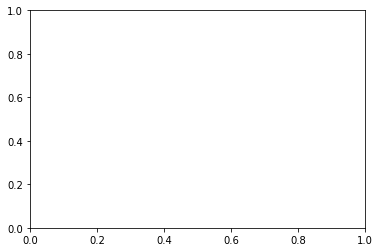

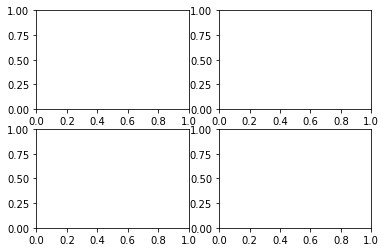

In [51]:
fig = plt.figure() # an empty figure with no Axes
fig, ax = plt.subplots() # a figure with a single Axes
fig, axs = plt.subplots(2, 2) # a figure with a 2x2 grid of Axes

#### Axes
This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given `Axes` object can only be in one `Figure`. The Axes contains two (or three in the case of 3D) `Axis` objects (be aware of the difference between *Axes* and *Axis*) which take care of the data limits (the data limits can also be controlled via the `axes.Axes.set_xlim()` and `axes.Axes.set_ylim()` methods). Each `Axes` has a title (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label (set via `set_ylabel()`).  

#### Axis
These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a `Locator` object and the ticklabels strings are formatted by a `Formatter`. The combination of the correct `Locator` and `Formatter` gives very fine control over the tick locations and labels.

#### Artists
Basically everything you can see on the figure is an artist (even the `Figure`, `Axes`, and `Axis` objects). This includes `Text` objects, `Line2D` objects, `collections` object, `Patch` objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the *canvas*. Most artists are tied to Axes; such an artist cannnot be shared by multiple Axes, or moved from one to another.

### Types of inputs to plotting functions
All of plotting functions expect `numpy.array` or `numpy.ma.masked_array` as input. Classes that are 'array-like' such as `pandas` data objects and `numpy.matrix` may or may not be work as intended. It is best to convert these to `numpy.array` objects prior to plotting.
For example, to convert a `pandas.DataFrame`:

In [52]:
a = pd.DataFrame(np.random.rand(4, 5), columns=list('abcde'))
a_asarray = a.values
a_asarray

array([[0.41938529, 0.85612969, 0.20887424, 0.21653182, 0.81111335],
       [0.69950481, 0.82080965, 0.56344818, 0.59209582, 0.74951115],
       [0.7645974 , 0.58322173, 0.27008039, 0.41338811, 0.50857227],
       [0.49345544, 0.54144959, 0.7657368 , 0.09715459, 0.69530839]])

### The object-oriented interface and the pyplot interface
As noted above, there are essentially two ways to use Matplotlib:
  - Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
  - Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting

So one can do (OO-style)

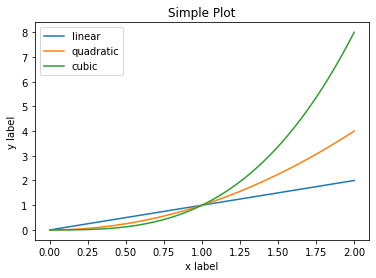

In [53]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots() # Create a figure and an axes
ax.plot(x, x, label='linear') # Plot some data on the axes
ax.plot(x, x**2, label='quadratic') # Plot more data on the axes...
ax.plot(x, x**3, label='cubic') # ... and some more.
ax.set_xlabel('x label') # Add an x-label to the axes.
ax.set_ylabel('y label') # Add an y-label to the axes.
ax.set_title('Simple Plot') # Add a title to the axes.
ax.legend() # Add a legend.

or (pyplot-style)

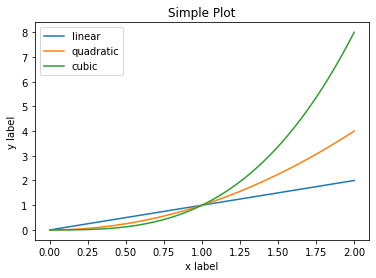

In [54]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear') # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic') # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple Plot')
plt.legend()

Matplotlib's documentation and examples use both the OO and pyplot approaches (which are equally powerful), and you should feel free to use either (however, it is preferable pick one of them and stick to it, instead of mixing them). *In general, restrict pyplot to interactive plotting (e.g., in a Jupyter notebook), and prefer the OO-style for non-interactive plotting (in functions and scripts that are intended to be reused as part of a larger project).*  
Typically one finds oneself making the same plots over and over again, but with different data sets, which leads to needing to write specialized functions to do the plotting. The recommended function signature is something like:

In [55]:
def my_plotter(ax, data1, data2, param_dict):
  """
  A helper function to make a graph

  Parameters
  ----------
  ax: Axes
    The axes to draw to

  data1: array
    The x data

  data2: array
    The y data

  param_dict: dict
    Dictionary of kwargs to pass to ax.plot
  
  Returns
  -------
  out: list
    list of artists added
  """
  out = ax.plot(data1, data2, **param_dict)
  return out

which you would then use as:

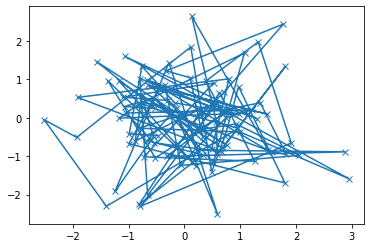

In [56]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots()
my_plotter(ax, data1, data2, {'marker': 'x'})

or if you wanted to have 2 sub-plots:

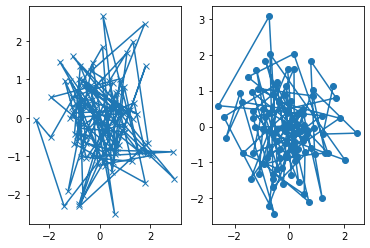

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

## Impressions
- `Axes` is a region of the image with the data space! I thought `Axes` means x-axis and y-axis. So confusing to learners whose mother language is not English...